In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.svm import LinearSVR
import xgboost as xgb

In [2]:
# Load and split the data
df = pd.read_csv(r'C:\Users\Rahul Vivek Sawant\Desktop\General\graduate admissions\Admission_Predict_Ver1.1.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

print(list(df.columns.values))

['serial_no.', 'gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']


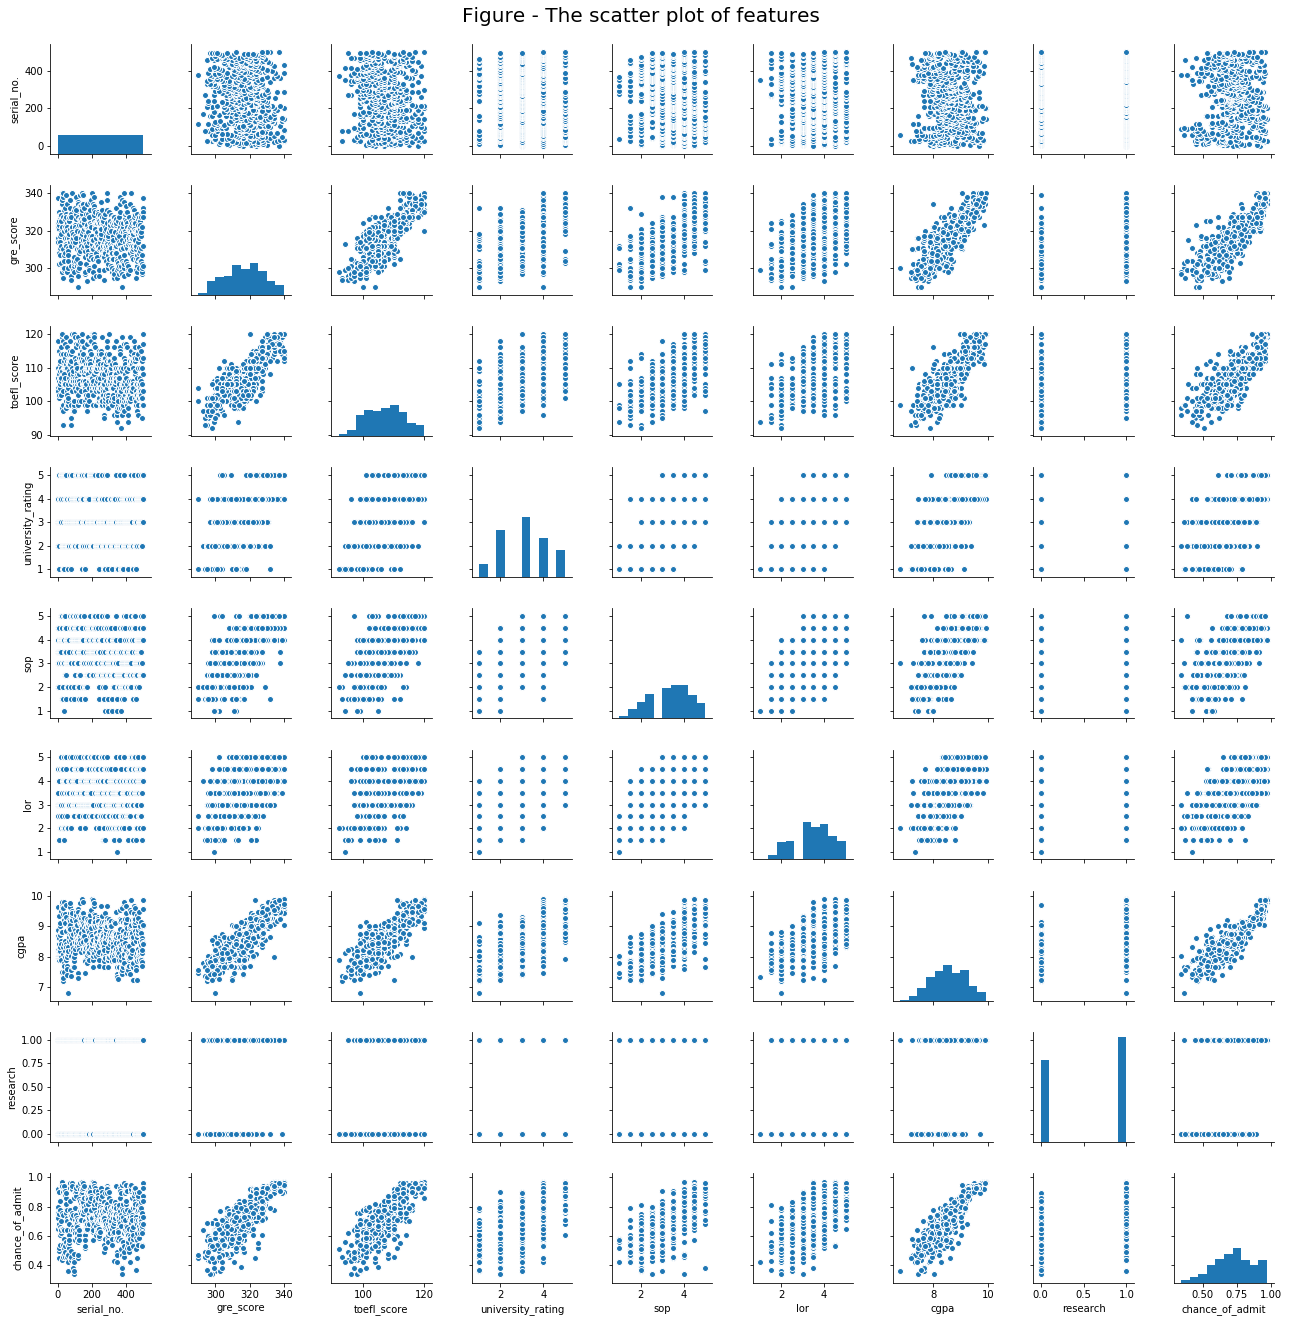

In [17]:
# Scatter plot of the features
cols = list(df.columns.values)
sns.pairplot(df[cols], size = 2)
plt.suptitle('Figure - The scatter plot of features ', x=0.5, y=1.01, verticalalignment='center', fontsize= 20)
plt.tight_layout()
plt.show();

In [ ]:
# Creating features and labels
y = df['chance_of_admit']
x = df.drop(columns='chance_of_admit')

# Linear regression

1. Using data normalization

In [3]:
scaler = Normalizer().fit(x)
rescaledX = scaler.transform(x)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size= 0.2, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (400, 8)
X test:  (100, 8)
y train:  (400,)
y test:  (100,)


In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_pred = lr.predict(X_test)
nlr = round(100*lr.score(X_test, y_test),3)
print('Score: ', nlr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  68.741
Mean-squared error:  0.0063923799060105636


2. Using min-max scaling

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(x)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size= 0.3, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (350, 8)
X test:  (150, 8)
y train:  (350,)
y test:  (150,)


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
y_pred = lr.predict(X_test)
mmlr = round(100*lr.score(X_test, y_test),3)
print('Score: ', mmlr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  83.204
Mean-squared error:  0.0035006842264875063


3. Using data Standardization

In [11]:
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [12]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size= 0.3, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (350, 8)
X test:  (150, 8)
y train:  (350,)
y test:  (150,)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_pred = lr.predict(X_test)
slr = round(100*lr.score(X_test, y_test),3)
print('Score: ', slr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  83.204
Mean-squared error:  0.003500684226487507


# XGBoost classifier

In [15]:
# Load and split the data
df = pd.read_csv(r'C:\Users\Rahul Vivek Sawant\Desktop\General\graduate admissions\Admission_Predict_Ver1.1.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

y = df['chance_of_admit']
x = df.drop(columns='chance_of_admit')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (350, 8)
X test:  (150, 8)
y train:  (350,)
y test:  (150,)


In [17]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
y_pred = model.predict(X_test)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))
xgbc = round(100*r2_score(y_test, y_pred),2)
print('R2 score for regression: ', xgbc)

Mean-squared error:  0.005246
R2 score for regression:  74.83


# Ridge regression classifier

In [19]:
# Load and split the data
df = pd.read_csv(r'C:\Users\Rahul Vivek Sawant\Desktop\General\graduate admissions\Admission_Predict_Ver1.1.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

y = df['chance_of_admit']
x = df.drop(columns='chance_of_admit')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (350, 8)
X test:  (150, 8)
y train:  (350,)
y test:  (150,)


In [21]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
y_pred = model.predict(X_test)
rrc = round(100*model.score(X_test, y_test),3)
print('Score: ', rrc)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  83.155
Mean-squared error:  0.003510859994821481


# Stochastic gradient descent (SGD)

In [23]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [25]:
sgd_reg = SGDRegressor(max_iter=50)
sgd_reg.fit(X_train_standard, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [26]:
y_pred = sgd_reg.predict(X_test_standard)
sgdc = round(100*sgd_reg.score(X_test_standard, y_test),2)
print('Score: ', sgdc)

Score:  83.15


# Multi-layer perceptron regressor (MLP)

In [27]:
mlp = MLPRegressor(hidden_layer_sizes=(100,),activation='relu',solver='lbfgs',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.5,random_state=15)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=15, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
y_pred = mlp.predict(X_test)
mlpr = round(100*mlp.score(X_test, y_test),2)
print('Score: ', mlpr)
print('Mean-squared error: ', mean_squared_error(y_test, y_pred))

Score:  81.3
Mean-squared error:  0.003897790181081174


In [29]:
algos = ['Normalised Linear Regression', 'Min-max scaling Linear Regression', 'Data standardization Linear Regression', 'XGBoost classifier', 'Ridge regression', 'Stochastic gradient descent', 'Multi-layer perceptron regressor']
score = [nlr, mmlr, slr, xgbc, rrc, sgdc, mlpr]

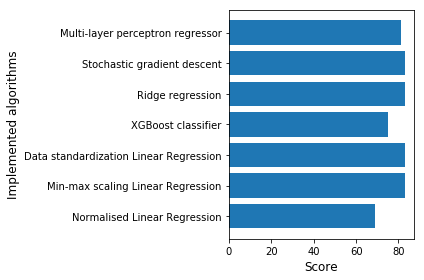

In [33]:
import matplotlib.pyplot as plt

plt.barh(algos, score)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Implemented algorithms', fontsize=12)
plt.tight_layout()

plt.show()